## Viewing and analyzing volumetric timeseries data

### Load volumetric timeseries data with dask

In [38]:
import dask.array as da

file_name = '../data/LLSM/AOLLSM_m4_560nm.zarr'
data = da.from_zarr(file_name)

In [39]:
data

,Array,Chunk
Bytes,12.52 GB,3.15 MB
Shape,"(199, 20, 768, 1024)","(1, 1, 768, 1024)"
Count,3981 Tasks,3980 Chunks
Type,float32,numpy.ndarray


### Create an empty napari viewer

In [40]:
%gui qt

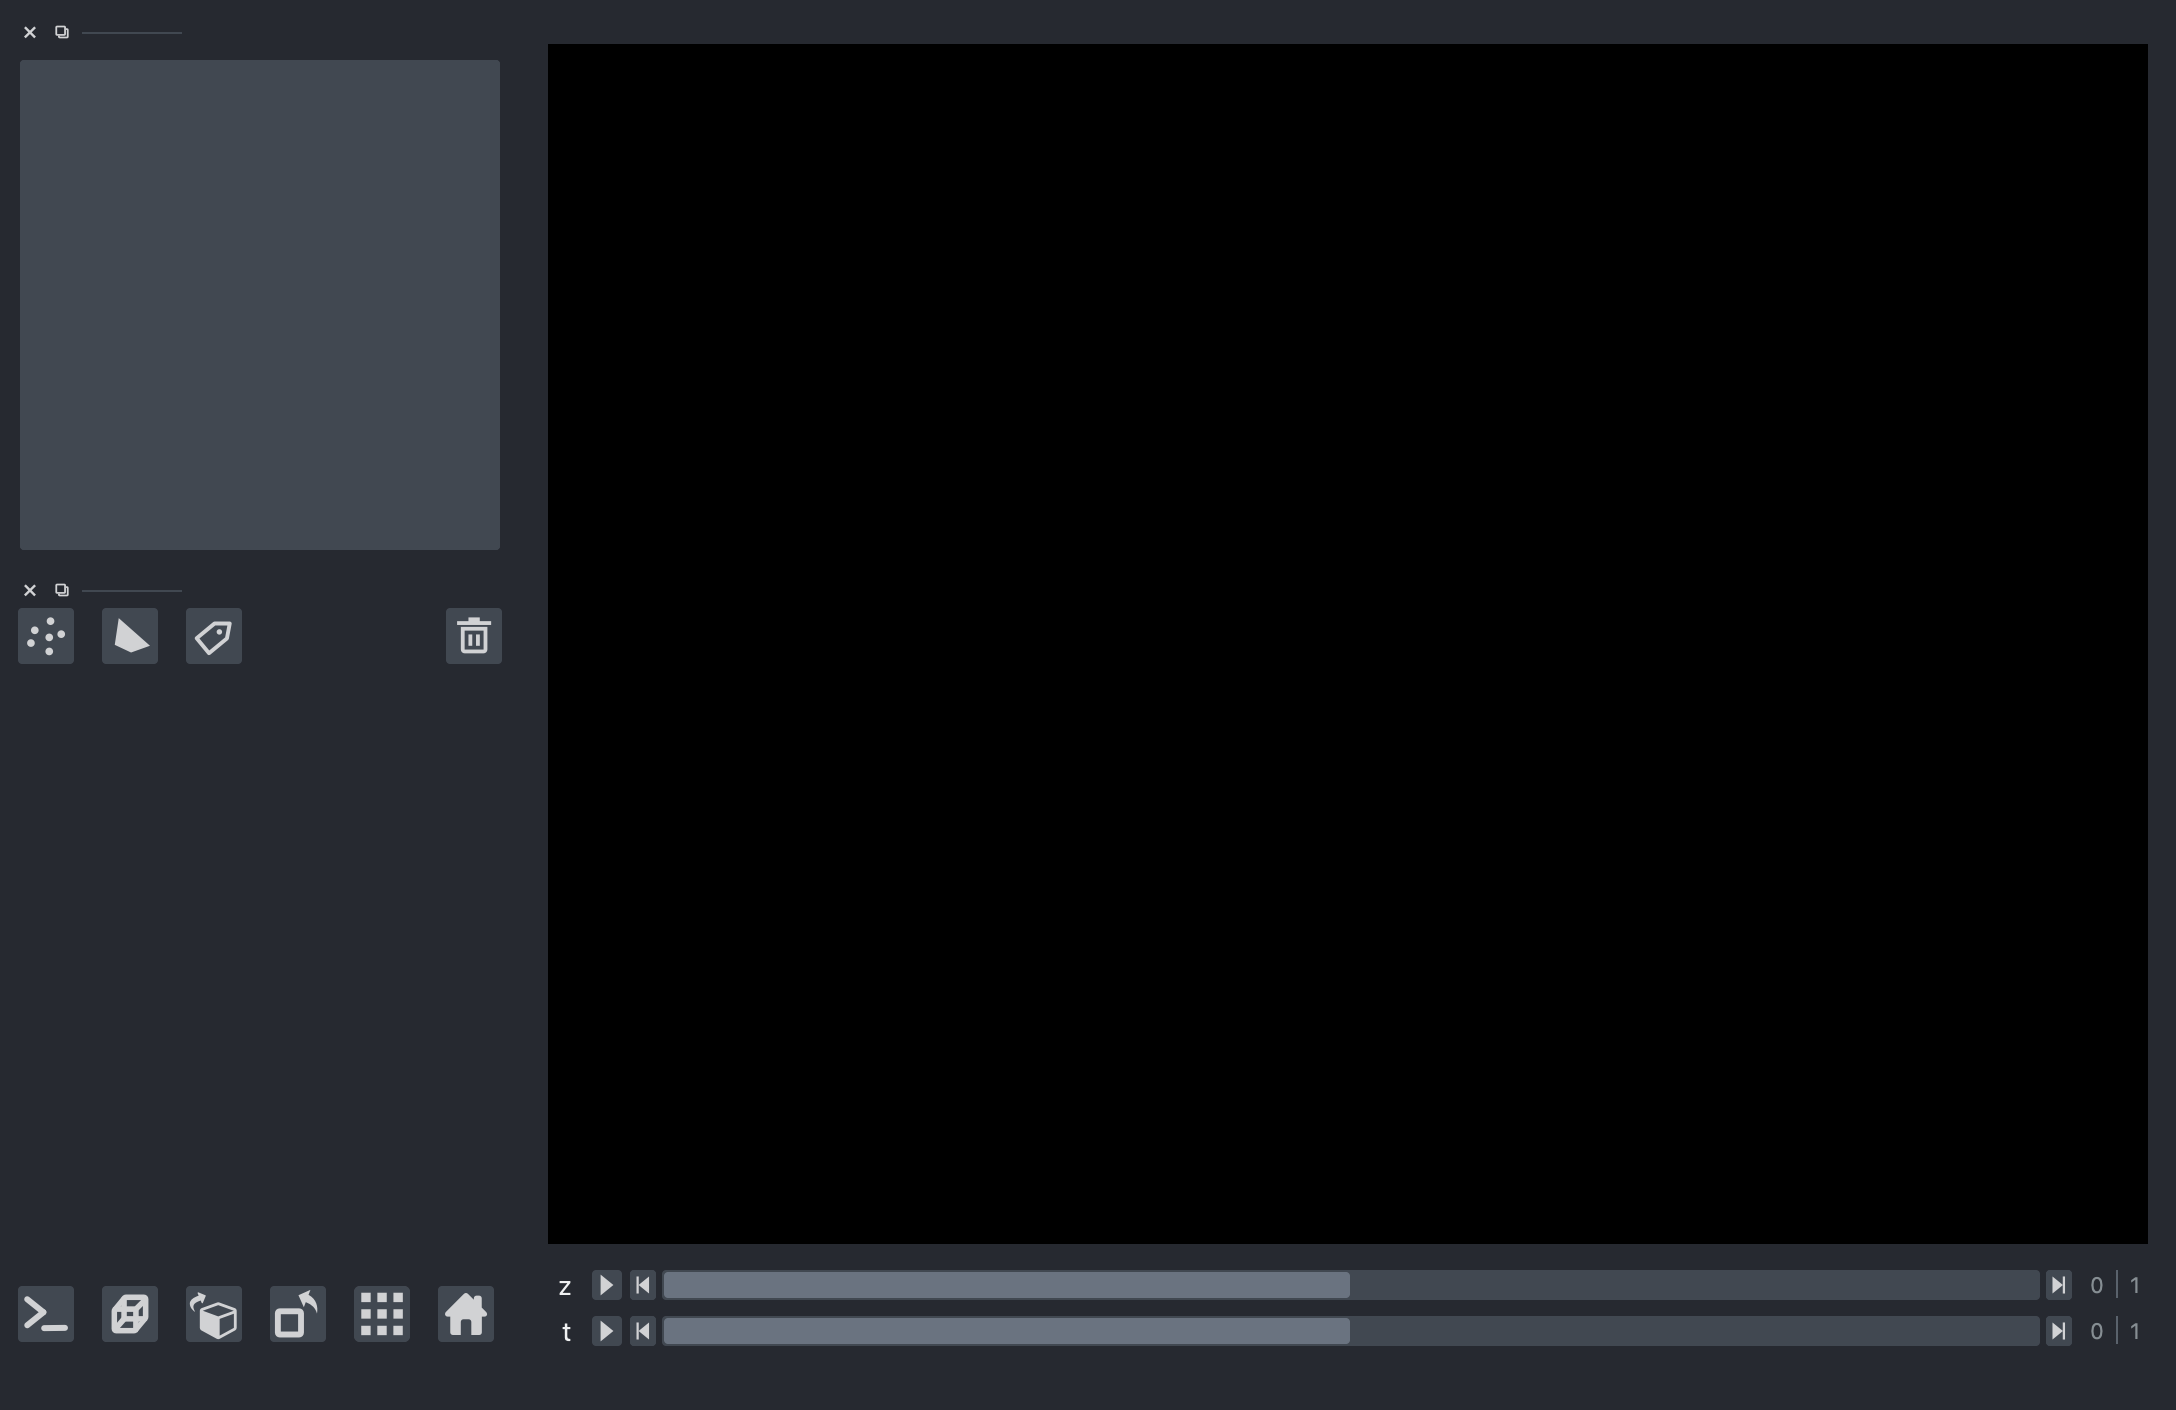

In [42]:
import napari
from napari.utils import nbscreenshot

viewer = napari.Viewer(axis_labels='tzyx')
nbscreenshot(viewer)

## Display the volumetric timeseries

In [44]:
viewer.add_image(data, name='LLSM', multiscale=False, scale=[1, 3, 1, 1],
            contrast_limits=[0, 150_000], colormap='magma');

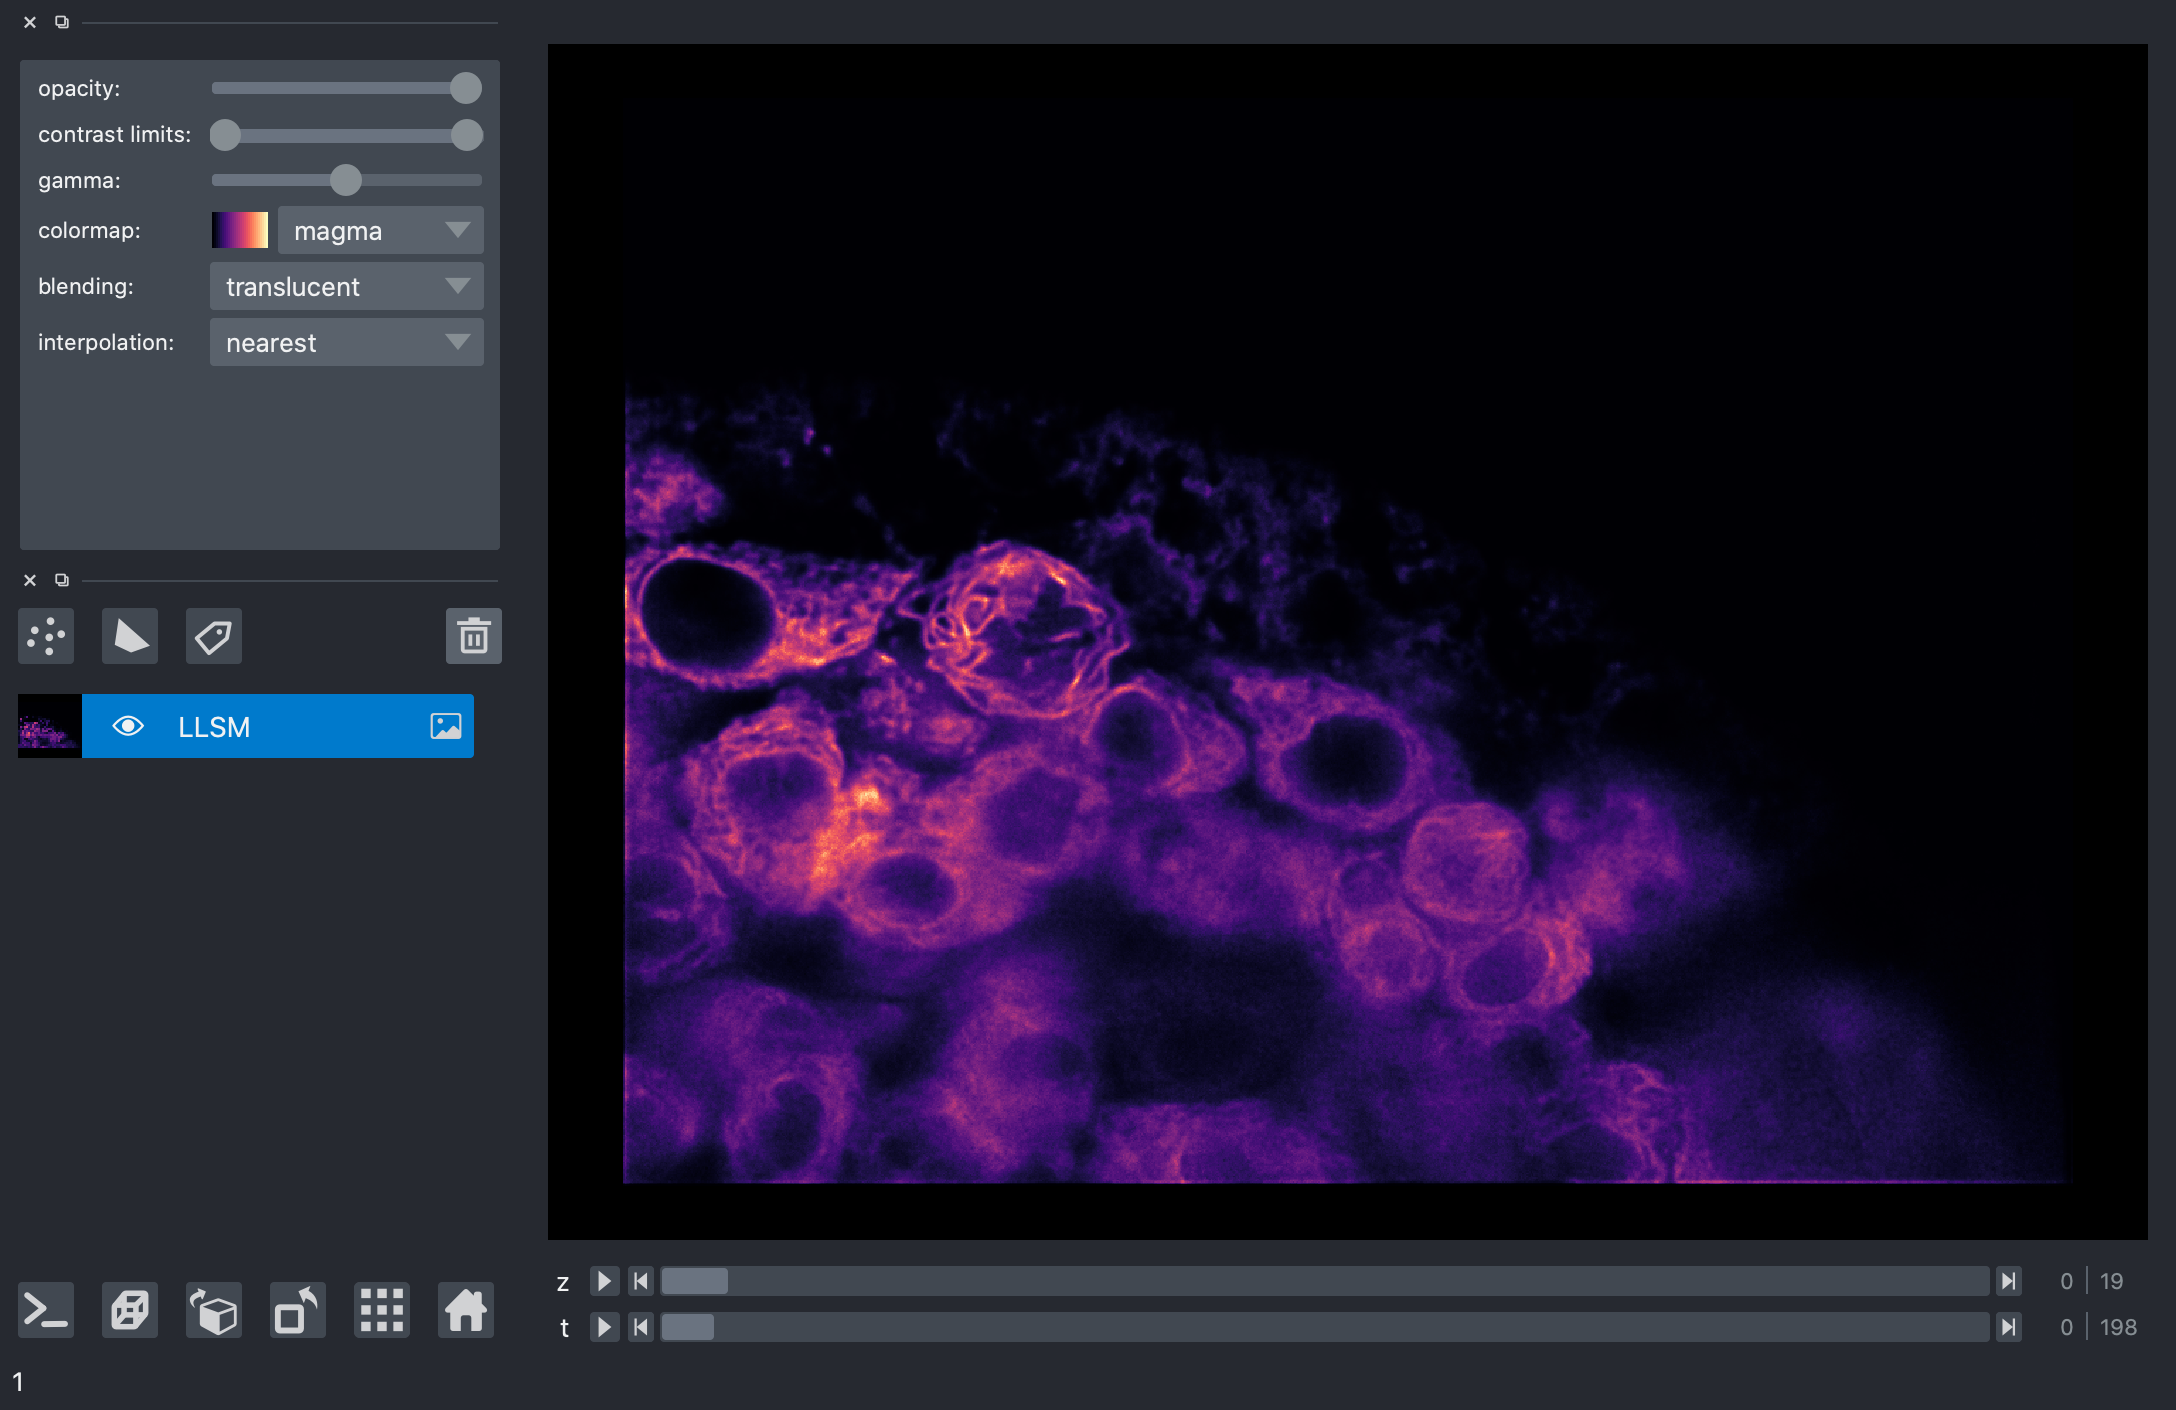

In [45]:
nbscreenshot(viewer)

### Add an analyzed layer

In [48]:
from skimage import filters


viewer.add_image(data.map_blocks(filters.sobel), name='sobel', scale=[1, 3, 1, 1],
            contrast_limits=[0, 10_000]);

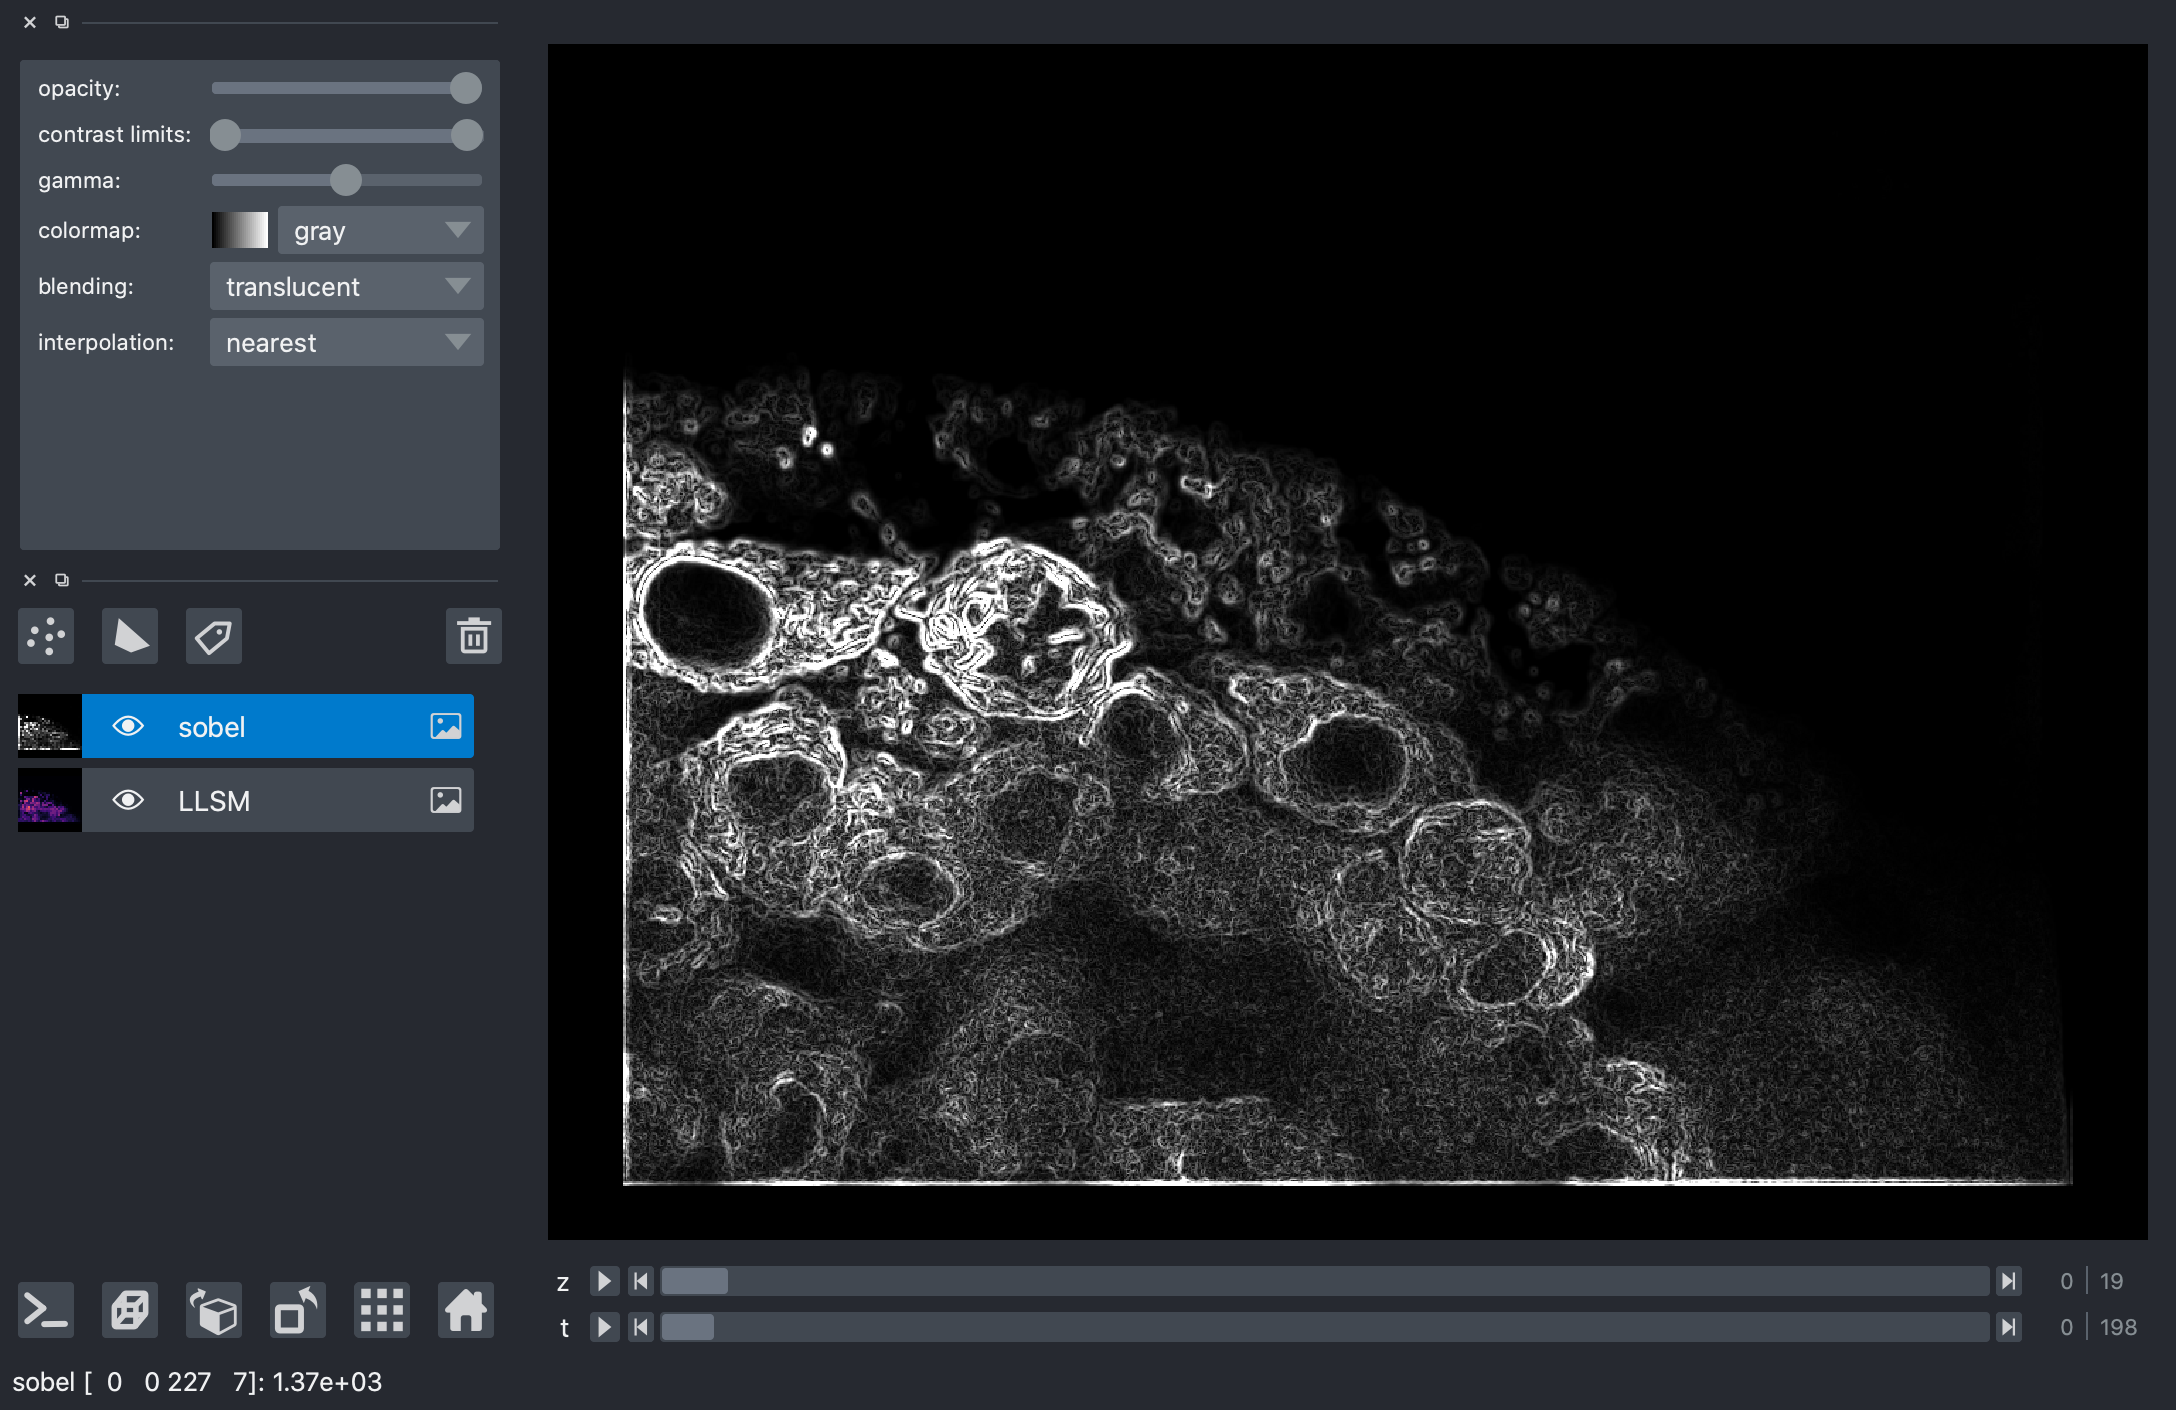

In [50]:
nbscreenshot(viewer)